In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20,10]
from math import floor

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [3]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df.drop(['availability','area_type','society'],axis = 'columns',inplace = True)
df.head(3)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00


In [5]:
## data cleaning

In [6]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df['bath'].fillna(floor(df['bath'].mean()),inplace = True)
df['balcony'].fillna(floor(df['balcony'].mean()),inplace = True)
df.dropna(subset= ['size','location'],inplace = True)

df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
# size column cleaning and preprocessing
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [10]:
df.drop(columns=['size'],inplace = True)
df.head(2)

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4


In [11]:
df.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
# total_sqft cleaning and preprocessing
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def conv_float(x):
    val = x.split('-')
    if len(val) == 2:
        return (float(val[0]) + float(val[1]))/2
    try:
        return float(x)
    except:
        return None


In [14]:
df['total_sqfeet'] = df.total_sqft.apply(lambda x : conv_float(x))

In [15]:
df.sample(10)

,location,total_sqft,bath,balcony,price,BHK,total_sqfeet
9906,Amruthahalli,1202,2.0,1.0,65.00,2,1202.0
4016,Green Glen Layout,1075,2.0,1.0,60.00,2,1075.0
3319,MCECHS layout,1500,3.0,2.0,65.00,3,1500.0
6861,Chennappa Layout,1080,2.0,2.0,44.80,2,1080.0
6213,Hulimavu,3035,5.0,3.0,220.00,3,3035.0
7368,Kamdhenu Nagar,1000,2.0,1.0,46.00,2,1000.0
1238,Uttarahalli,1617,3.0,3.0,66.68,3,1617.0
5356,Bommanahalli,910,2.0,1.0,45.00,2,910.0
3911,Gottigere,1621,3.0,3.0,72.00,3,1621.0
247,Kothanur,1577,3.0,1.0,70.00,3,1577.0


In [16]:
df.drop(['total_sqft'],axis = 1,inplace= True)

In [17]:
# feature engineering
df['price_per_sqft'] = df.price*100000/df.total_sqfeet
df.head(3)

,location,bath,balcony,price,BHK,total_sqfeet,price_per_sqft
0,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556


In [18]:
# removing spaces from location to calculate and count no. of data 

df.location = df.location.apply(lambda x : x.strip())

In [19]:
df.sample(10)

,location,bath,balcony,price,BHK,total_sqfeet,price_per_sqft
7076,Devanahalli,2.0,1.0,52.0,2,1080.0,4814.814815
4019,Yelachenahalli,2.0,1.0,85.0,5,897.0,9476.031215
11838,Ullal Uppanagar,2.0,0.0,82.0,2,1200.0,6833.333333
6927,Amblipura,3.0,2.0,100.0,3,1605.0,6230.529595
12804,KR Puram,2.0,1.0,39.9,2,1100.0,3627.272727
9808,Electronic City Phase II,2.0,1.0,55.0,2,1244.0,4421.221865
10560,HSR Layout,5.0,1.0,245.0,5,4200.0,5833.333333
4834,Kanakpura Road,2.0,2.0,43.0,2,1110.0,3873.873874
11231,Kamakya Layout,3.0,1.0,108.0,4,2400.0,4500.000000
10451,NRI Layout,3.0,3.0,75.0,3,1789.0,4192.286193


In [20]:
pd.options.display.max_columns = None
location_stats = df.groupby('location')['location'].count()
location_stats.head(100)


location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
                                                   ..
Ambedkar Colony                                     7
Ambedkar Nagar                                     31
Amblipura                                           6
Amco Colony                                         1
Amrita Nagar                                        1
Name: location, Length: 100, dtype: int64

In [21]:
# reducing unique values by adding others for less than 10 count
location_stats.head(50);

In [22]:
location_stats.sort_values(ascending =False).head(50)

location
Whitefield                  540
Sarjapur  Road              397
Electronic City             304
Kanakpura Road              273
Thanisandra                 237
Yelahanka                   212
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 152
7th Phase JP Nagar          149
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Electronics City Phase 1     88
Hoodi                        88
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     82
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Kengeri                      73
Ramamurthy Nagar             73
Koramangala                  72

In [23]:
len(location_stats[location_stats <= 10])

1052

In [24]:
location_less_than_ten = location_stats[location_stats <= 10]

In [25]:
df.location = df.location.apply(lambda x : 'other' if x in location_less_than_ten else x) 

In [26]:
len(df.location.unique())

242

In [27]:
df.sample(10)

,location,bath,balcony,price,BHK,total_sqfeet,price_per_sqft
12896,other,5.0,1.0,680.00,5,4000.0,17000.000000
9669,Parappana Agrahara,2.0,2.0,45.00,2,1194.0,3768.844221
12260,Banashankari,4.0,3.0,470.00,4,2400.0,19583.333333
13207,other,2.0,0.0,75.00,3,1480.0,5067.567568
7993,HAL 2nd Stage,7.0,3.0,250.00,7,1000.0,25000.000000
3798,Hoodi,2.0,1.0,57.63,2,1055.0,5462.559242
10254,Hulimavu,2.0,0.0,90.00,2,1500.0,6000.000000
9012,Bommasandra Industrial Area,2.0,1.0,28.88,2,1000.0,2888.000000
4040,Padmanabhanagar,2.0,0.0,75.00,3,1531.0,4898.758981
9359,other,2.0,3.0,90.00,2,1320.0,6818.181818


In [28]:
# outlier removing using BHK and total_sqfeet taking 300 as threshold

df[df.total_sqfeet/df.BHK < 300].head()

,location,bath,balcony,price,BHK,total_sqfeet,price_per_sqft
9,other,6.0,1.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,1.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,1.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,0.0,85.0,8,1350.0,6296.296296
70,other,3.0,2.0,100.0,3,500.0,20000.000000


In [29]:
df = df[~(df.total_sqfeet/df.BHK < 300)]

In [30]:
df.shape 

(12559, 7)

In [31]:
# price per sqft outlier using normal disribution

df.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
# mean 1+ and 1- standard deviation
def remv_outlier (df):
    df_out = pd.DataFrame()
    for key ,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True) 
    return df_out     
df1 = remv_outlier(df)
df1.shape            

(10286, 7)

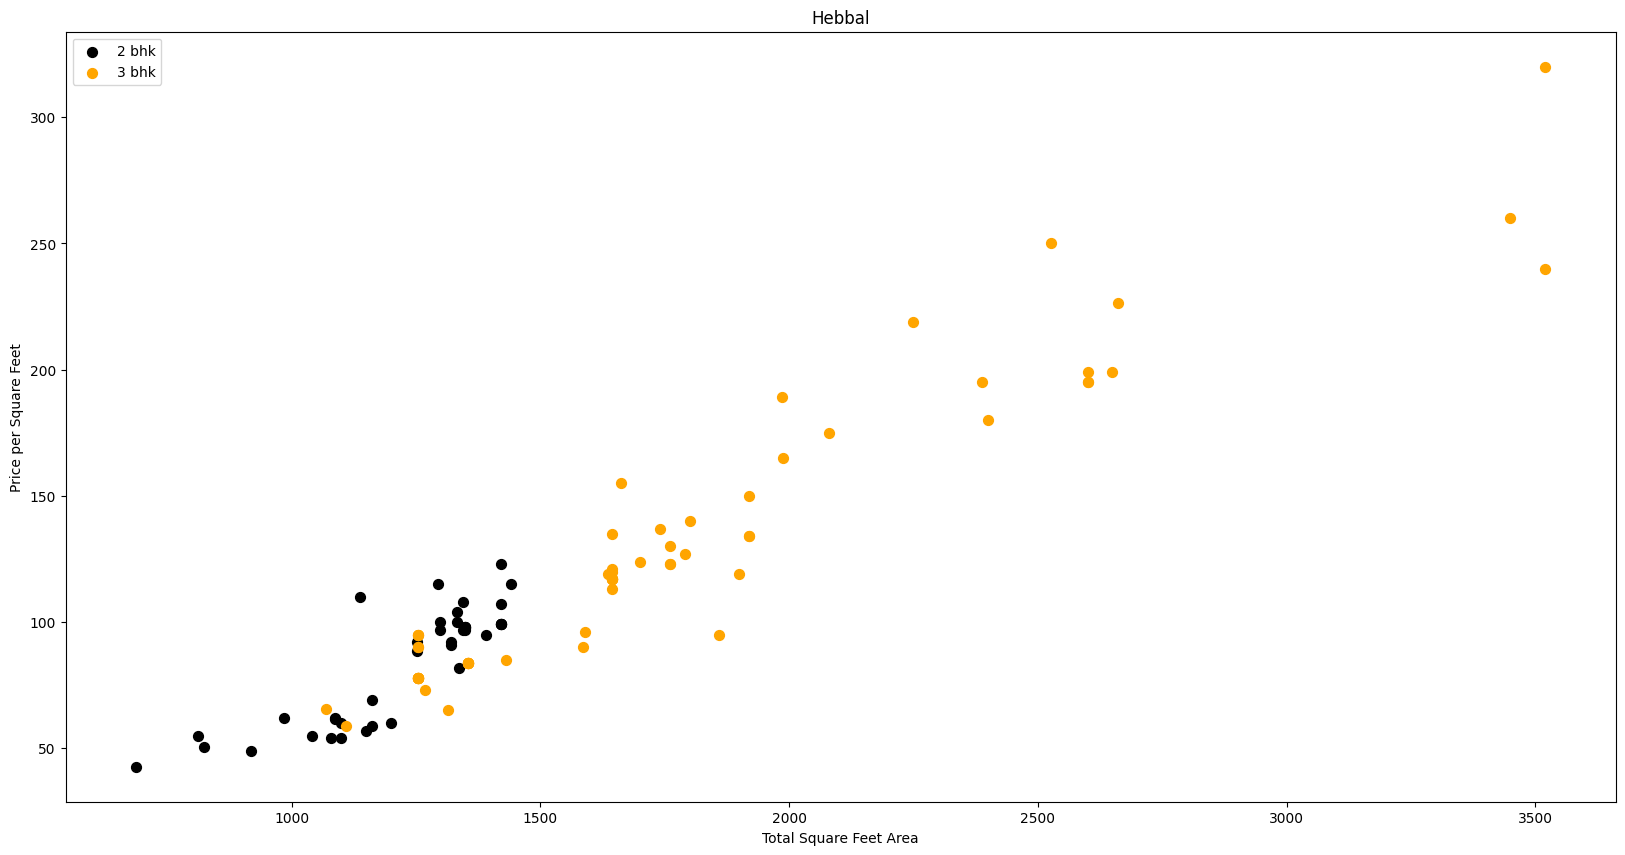

In [33]:
def plot_scatterplot(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2) ] 
    bhk3 = df[(df.location == location) & (df.BHK == 3) ]

    plt.scatter(bhk2.total_sqfeet,bhk2.price,color = 'black',label = '2 bhk',s = 50) 
    plt.scatter(bhk3.total_sqfeet,bhk3.price,color = 'orange',label = '3 bhk',s = 50) 
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatterplot(df1,'Hebbal')

In [34]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft <  (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')
df2 = remove_bhk_outlier(df1)
df2.shape

(7353, 7)

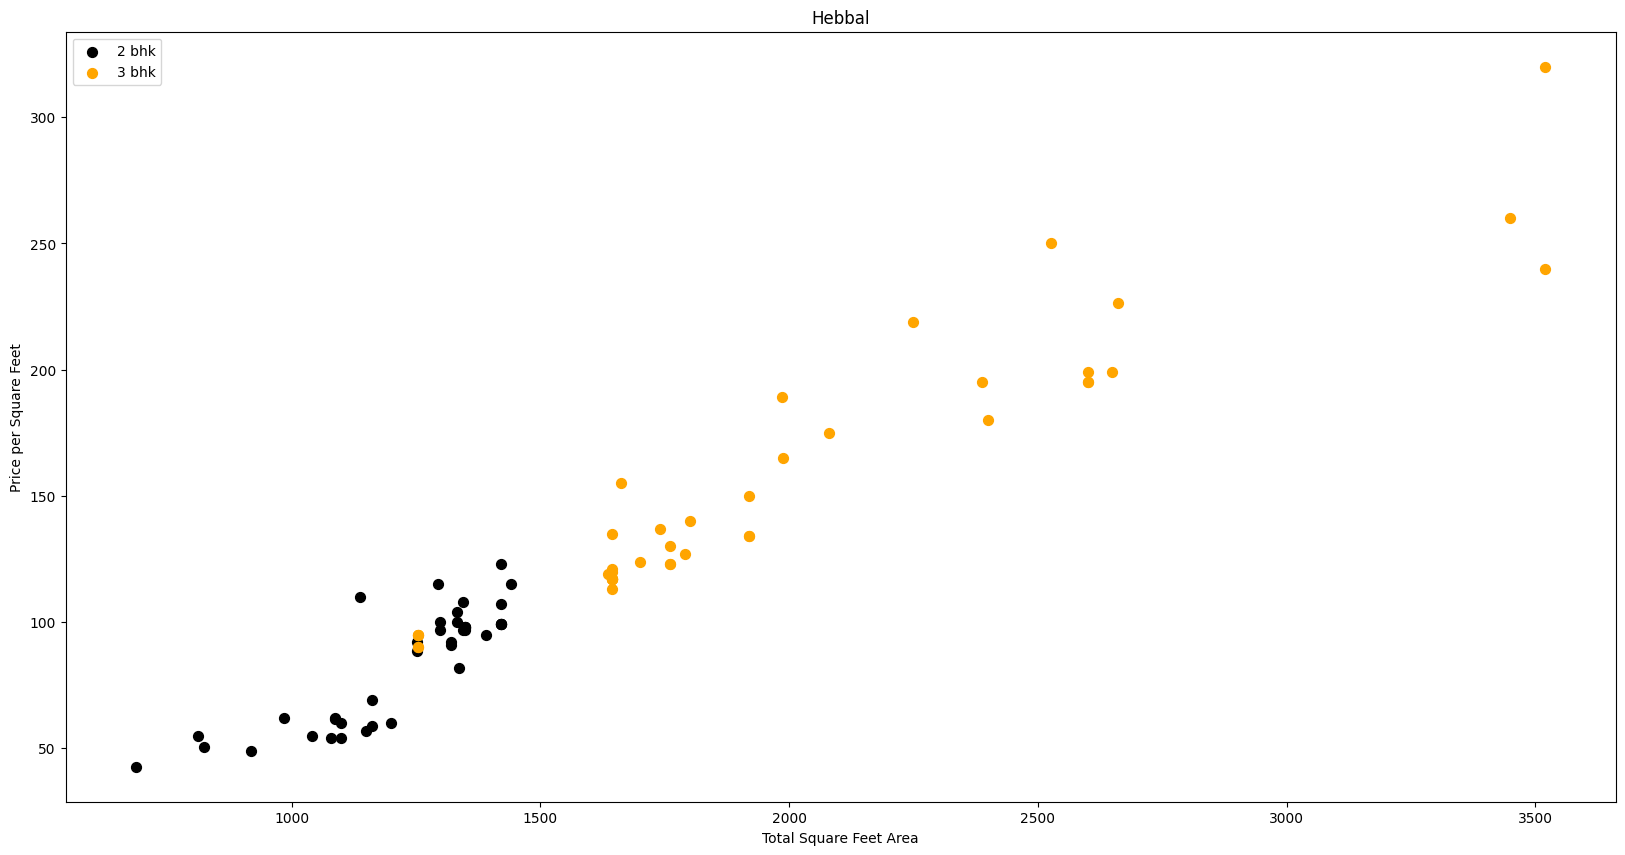

In [35]:
plot_scatterplot(df2,'Hebbal')

Text(0, 0.5, 'Count')

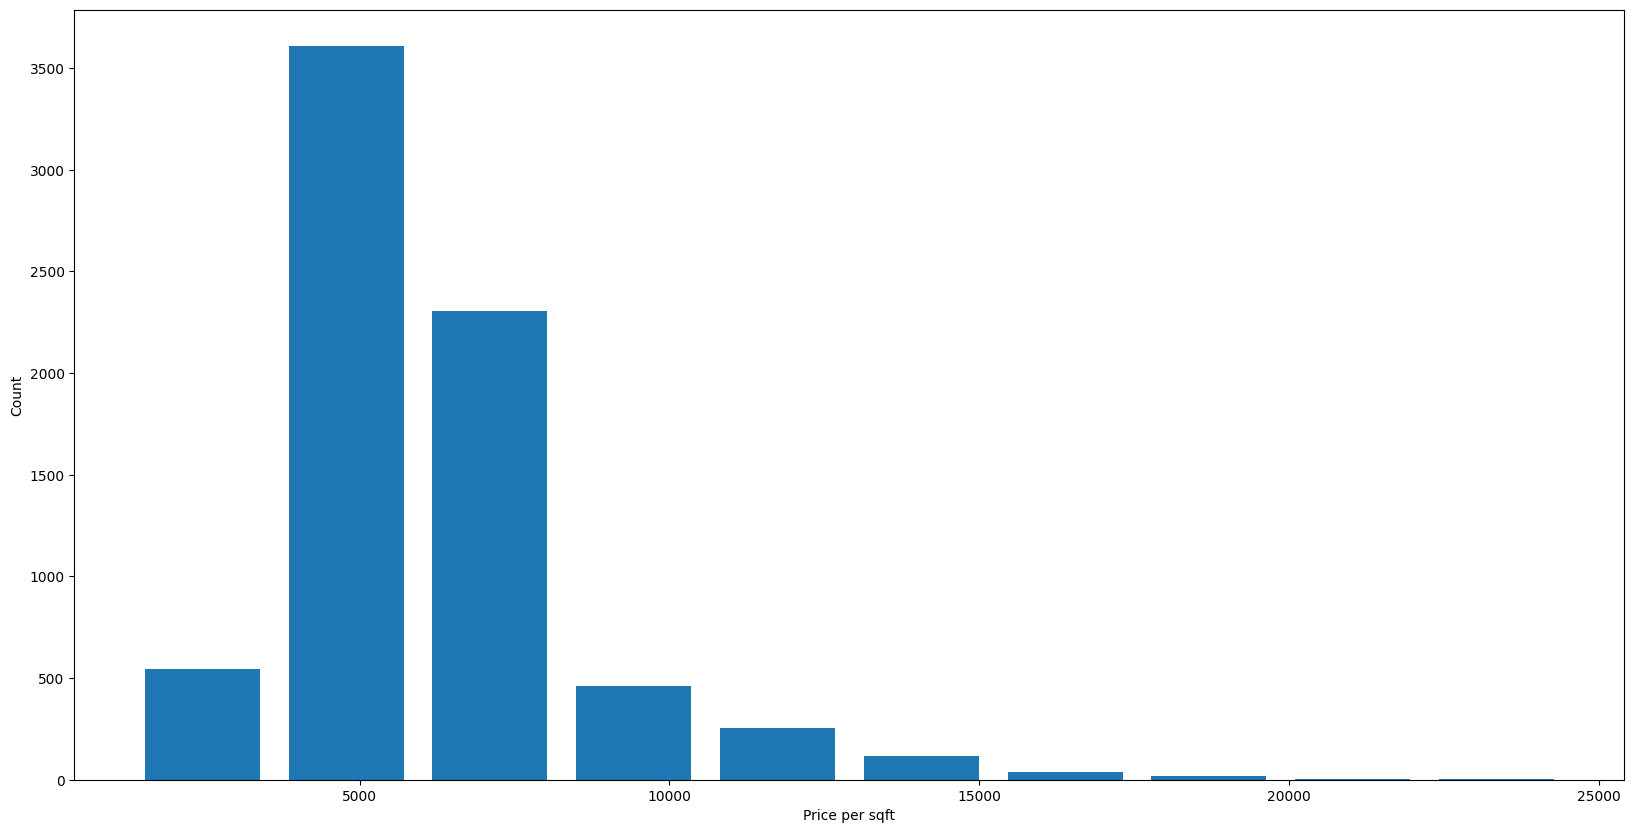

In [36]:
plt.hist(df2.price_per_sqft,rwidth= 0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [37]:
df2.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [38]:
df2[df2.bath > 10]

,location,bath,balcony,price,BHK,total_sqfeet,price_per_sqft
5306,Neeladri Nagar,12.0,1.0,160.0,10,4000.0,4000.000000
8530,other,12.0,1.0,525.0,10,12000.0,4375.000000
8619,other,16.0,1.0,550.0,16,10000.0,5500.000000
9352,other,12.0,1.0,150.0,11,6000.0,2500.000000
9683,other,13.0,0.0,275.0,13,5425.0,5069.124424


Text(0, 0.5, 'Count')

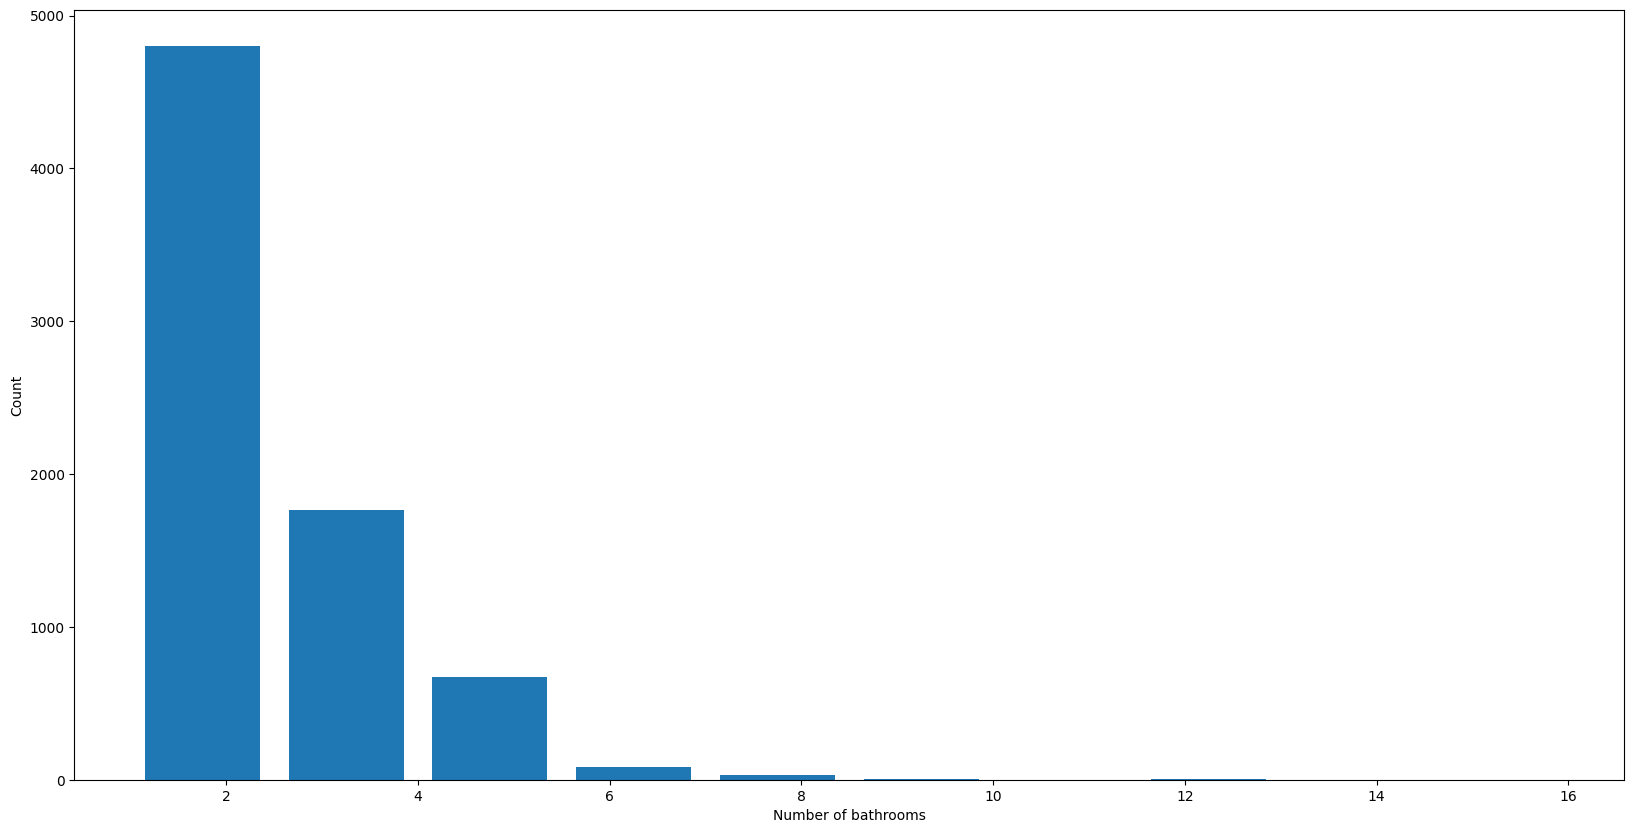

In [39]:
plt.hist(df2.bath,rwidth= 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
df2[df2.bath > df2.BHK + 2]

,location,bath,balcony,price,BHK,total_sqfeet,price_per_sqft
1634,Chikkabanavar,7.0,2.0,80.0,4,2460.0,3252.032520
5267,Nagasandra,8.0,1.0,450.0,4,7000.0,6428.571429
6748,Thanisandra,6.0,2.0,116.0,3,1806.0,6423.034330
8455,other,9.0,1.0,1000.0,6,11338.0,8819.897689


In [41]:
df3 = df2[df2.bath < df2.BHK + 2]
df3.shape

(7275, 7)

In [42]:
import warnings
warnings.filterwarnings('ignore')
df3.drop('price_per_sqft',axis = 1,inplace = True)

In [43]:
df3.shape

(7275, 6)

In [44]:
# df3.drop('balcony',axis=1,inplace = TRUE)

In [45]:
# Machine Learning part
dummies = pd.get_dummies(df3.location)
dummies.drop('other',axis= 1 , inplace= True)

In [46]:
df4 = pd.concat([df3.drop(['location','balcony'],axis = 1),dummies],axis= 1)
df4.head(1)

,bath,price,BHK,total_sqfeet,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# dropping price bez its a depanded var
price = df4.price
df4.drop('price',axis = 1,inplace = True)

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df4,price,test_size= 0.25)

In [49]:
from sklearn.linear_model import  LinearRegression
LR_model = LinearRegression()

LR_model.fit(x_train,y_train)

LinearRegression()

In [50]:
LR_model.score(x_test,y_test)

0.8159316220110929

In [51]:
# appling crossvalidation 

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_val = ShuffleSplit(n_splits = 5 , test_size= 0.2, random_state= 0)
cross_val_score(LinearRegression(),df4,price,cv =cross_val)

array([0.80702643, 0.77249195, 0.86466289, 0.83528873, 0.81806721])

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [54]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
#                 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(df4,price)

,model,best_score,best_params
0,linear_regression,0.819507,{}
1,lasso,0.679929,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.734401,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [55]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(df4.columns == location )[0][0]
    
    x =np.zeros(len(df4.columns))
    x[0],x[1],x[2] = bath,bhk,sqft
    
    if loc_index >= 0:
        x[loc_index] = 1
    return LR_model.predict([x])[0]

In [56]:
# predict_price(location,area,bath,bhk)
predict_price('1st Phase JP Nagar',1000,2,2)

81.49840834849469

In [57]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

85.49170454110339

In [58]:
predict_price('Indira Nagar',1000, 2, 2)

194.11585712758313

In [59]:
predict_price('Indira Nagar',1000, 3, 3)

198.1091533201918

In [60]:
# Now saving our model using pickle

In [61]:
import pickle
with open('Home_price_prediction_pickel_model','wb') as model_file:
    pickle.dump(LR_model,model_file)
    
    

In [62]:
# exporting index and columns name using json 
import json
columns = {
    'data_columns' : [col.lower() for col in df4.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))